In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
#from matplotlib_inline.backend_inline import set_matplotlib_formats
#set_matplotlib_formats('svg')

In [2]:
melted_df = pd.read_csv("collated/melted.tsv", sep='\t')
melted_df = melted_df[~melted_df.variable.isin({
    "variance", "count", "median_rank", "inverse_median_rank",
    "standard_deviation", "median_absolute_deviation",
    "geometric_mean_rank", "harmonic_mean_rank",
    "inverse_geometric_mean_rank", "inverse_arithmetic_mean_rank",
    "hits_at_1", "hits_at_3",
    "adjusted_hits_at_1", "adjusted_hits_at_3",
    "z_hits_at_1", "z_hits_at_3",
})]
melted_df

,dataset,dataset_triples,model,evaluation,training,variable,value
0,fb15k237,310079,rotate,12.272454,20111.204174,adjusted_arithmetic_mean_rank,0.079702
1,fb15k237,310079,complex,12.358080,12251.624246,adjusted_arithmetic_mean_rank,0.065828
2,fb15k237,310079,tucker,13.126415,23697.617721,adjusted_arithmetic_mean_rank,0.021147
3,fb15k237,310079,transe,10.697730,6152.676195,adjusted_arithmetic_mean_rank,0.030702
4,wn18rr,92583,complex,1.646411,9550.996599,adjusted_arithmetic_mean_rank,0.321934
...,...,...,...,...,...,...,...
430,nations,1992,transe,0.211528,82.261878,z_inverse_harmonic_mean_rank,0.402678
431,kinships,10686,rotate,1.039053,712.412558,z_inverse_harmonic_mean_rank,0.768561
432,kinships,10686,complex,0.895454,61.918725,z_inverse_harmonic_mean_rank,0.661836
433,kinships,10686,tucker,0.921731,146.934309,z_inverse_harmonic_mean_rank,0.863480


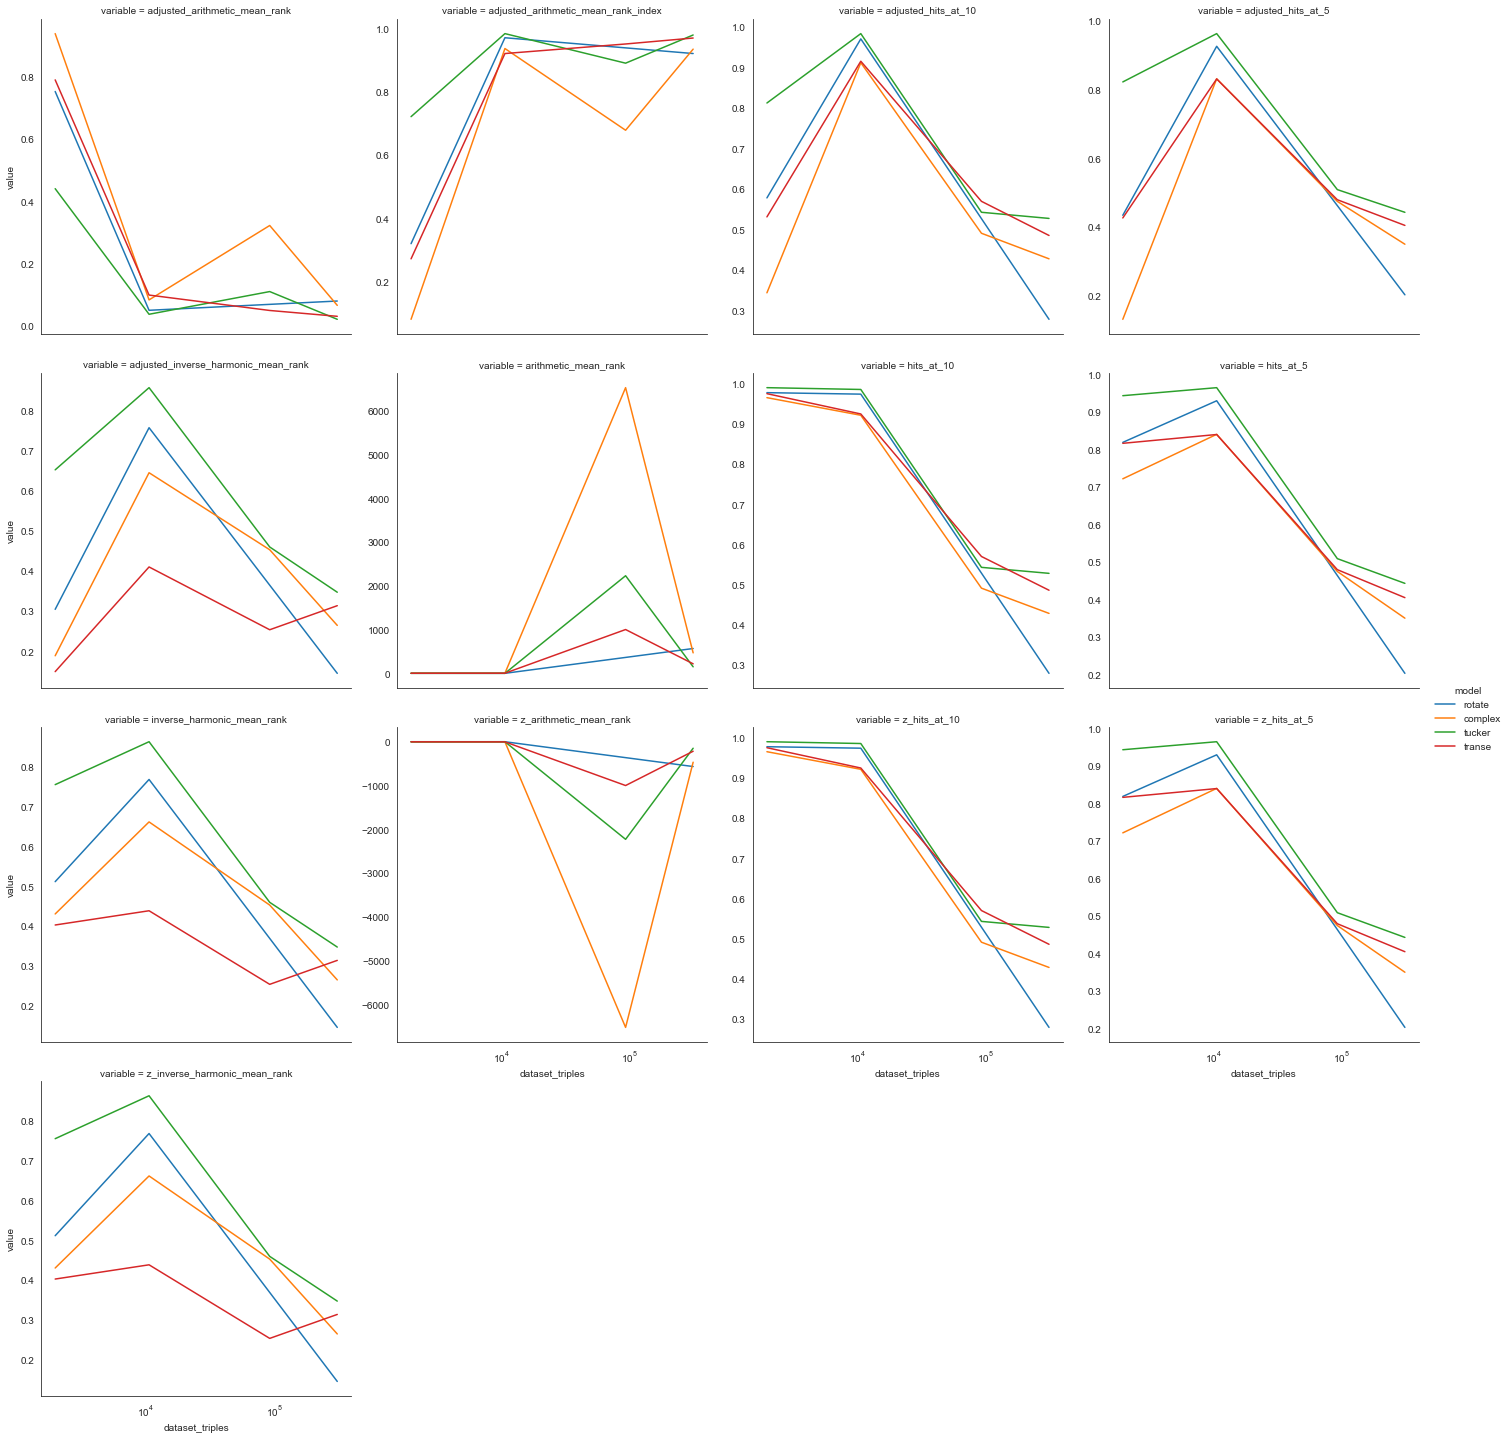

In [3]:
g = sns.relplot(
    data=melted_df, 
    x="dataset_triples", y="value", hue="model",
    col="variable",
    col_wrap=4,
    kind="line",
    facet_kws={'sharey': False, 'sharex': True},
).set(xscale="log")
plt.savefig("results.png", dpi=400)
plt.show()